In [1]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1. ¿Cuál es el día preferido para comer?

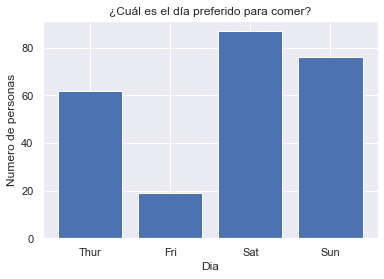

In [29]:
days = tips.groupby('day').size().reset_index(name='count')
plt.bar(days['day'], days['count'])
sns.set(style="darkgrid")
plt.title("¿Cuál es el día preferido para comer?")
plt.xlabel('Dia')
plt.ylabel('Numero de personas')

#show plot
plt.show()


In [5]:
days = tips.day.value_counts()
days

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

2. ¿Qué días de la semana hay más pagadores hombres que mujeres?

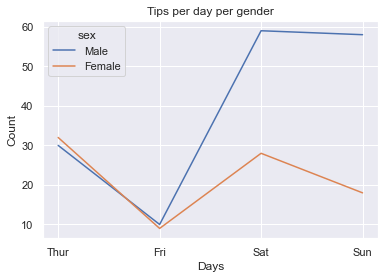

In [35]:
gender = tips.groupby(['day','sex'])[['size']].count()
sns.lineplot(x="day", y="size", hue="sex", data=gender).set_title('Tips per day per gender')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

3. ¿Cree que los importes de las facturas cambian considerablemente según se fume?.

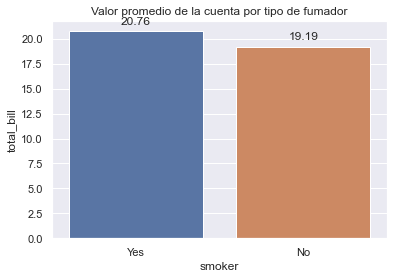

In [54]:
smoker = tips.groupby('smoker')['total_bill'].mean().reset_index()
sns.set(style="darkgrid")
df = sns.load_dataset('tips')
ax = sns.barplot(x="smoker", y="total_bill", data=smoker)
plt.title('Valor promedio de la cuenta por tipo de fumador')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

<Figure size 432x216 with 0 Axes>

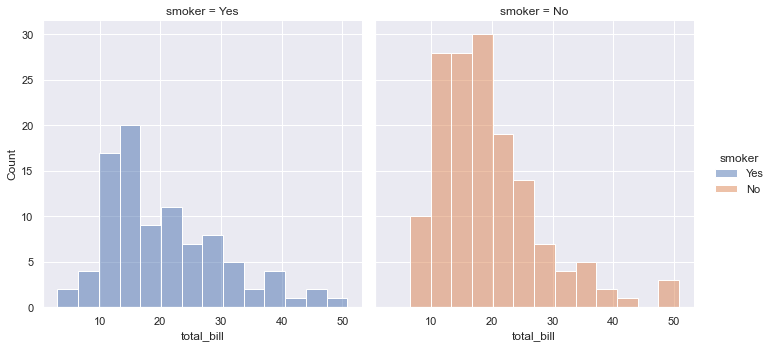

In [34]:
plt.figure(figsize=(6,3))
sns.displot(data=tips, x="total_bill", hue="smoker", col="smoker")

4. ¿Está la propina correlacionada con la factura_total? Dibuja un gráfico de dispersión

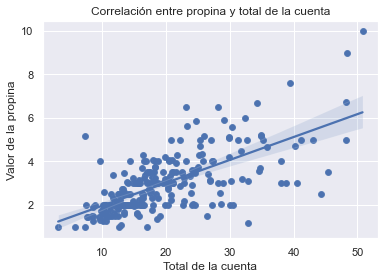

In [40]:
sns.scatterplot(x='total_bill', y='tip', data=tips)
ax = sns.regplot(x="total_bill", y="tip", data=tips)
ax.set_title("Correlación entre propina y total de la cuenta")
ax.set_xlabel("Total de la cuenta")
ax.set_ylabel("Valor de la propina")

plt.show()

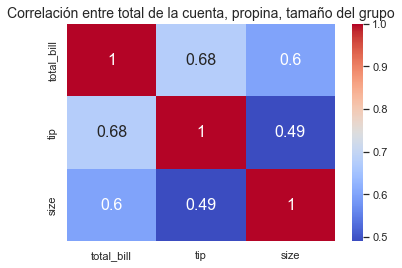

In [56]:
fig, ax = plt.subplots()
sns.set(style="darkgrid")

sns.heatmap(tips.corr(), annot=True, cmap='coolwarm', ax=ax, 
            annot_kws={"size": 16})
ax.set_title('Correlación entre total de la cuenta, propina, tamaño del grupo', fontsize=14)
plt.show()